In [484]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [485]:
# load kaggle dataset: https://www.kaggle.com/alketcecaj/one-year-of-fitbit-chargehr-data
df = pd.read_csv('/Users/evarubin/Dev/thinkful/data/cleaned-One_Year_of_FitBitChargeHR_Data.csv', sep='\t')

# load updated csv file to complete challenge question
df_activity = pd.read_csv('/Users/evarubin/Dev/thinkful/data/cleaned-update-One_Year_of_FitBitChargeHR_Data.csv', sep='\t')

In [486]:
# plot parameters
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [487]:
# show columns
df.columns

Index(['Date', 'Calories', 'Steps', 'Distance_meters', 'Distance_miles',
       'floors', 'Minutes_sitting', 'Minutes_of_slow_activity',
       'Minutes_of_moderate_activity', 'Minutes_of_intense_activity'],
      dtype='object')

In [488]:
# show columns for df_activity
df_activity.columns

Index(['Date', 'Calories', 'Steps', 'Distance_meters', 'Distance_miles',
       'floors', 'Minutes', 'Activity', 'Minutes_sitting'],
      dtype='object')

In [489]:
#plt.hist(df.lat_change, color='red', alpha=.5, label='Change in Latitude')
df.describe()

,Calories,Steps,Distance_meters,Distance_miles,floors,Minutes_sitting,Minutes_of_slow_activity,Minutes_of_moderate_activity,Minutes_of_intense_activity
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,26871.580381,9603.904632,6724.613079,4.178638,16.646975,743.914714,235.525886,26.209809,35.442065
std,9768.649543,5841.604537,4086.064333,2.538921,57.975508,246.881542,87.652778,20.354968,31.070864
min,330.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26315.000000,5938.000000,4057.000000,2.520000,5.000000,614.500000,178.500000,8.000000,10.000000
50%,29170.000000,9923.000000,7043.000000,4.380000,11.000000,711.000000,226.000000,24.000000,29.000000
75%,32430.000000,13722.000000,9084.500000,5.645000,16.000000,838.500000,290.000000,42.000000,54.000000
max,43510.000000,26444.000000,20045.000000,12.460000,822.000000,1421.000000,472.000000,101.000000,153.000000


In [490]:
# convert Date column to date-time type so I can manipulate it
df['Date'] = pd.to_datetime(df['Date'])

# convert for df_activity
df_activity['Date'] = pd.to_datetime(df_activity['Date'])

In [491]:
# Add month and year columns
df['Month'] = df['Date'].dt.strftime('%b')
df['Year'] = df['Date'].dt.strftime('%Y')

# Add month and year columns to df_activity
df_activity['Month'] = df_activity['Date'].dt.strftime('%b')
df_activity['Year'] = df_activity['Date'].dt.strftime('%Y')

In [492]:
# assign quarters to new Period column
df.loc[(df['Month']=='May') | (df['Month']=='Jun') | (df['Month']=='Jul'), 'Period'] = 'P1'
df.loc[(df['Month']=='Aug') | (df['Month']=='Sep') | (df['Month']=='Oct'), 'Period'] = 'P2'
df.loc[(df['Month']=='Nov') | (df['Month']=='Dec') | (df['Month']=='Jan'), 'Period'] = 'P3'
df.loc[(df['Month']=='Feb') | (df['Month']=='Mar') | (df['Month']=='Apr'), 'Period'] = 'P4'

# assign quarters to new Period column for df_activity
df_activity.loc[(df_activity['Month']=='May') | (df_activity['Month']=='Jun') | (df_activity['Month']=='Jul'), 'Period'] = 'P1'
df_activity.loc[(df_activity['Month']=='Aug') | (df_activity['Month']=='Sep') | (df_activity['Month']=='Oct'), 'Period'] = 'P2'
df_activity.loc[(df_activity['Month']=='Nov') | (df_activity['Month']=='Dec') | (df_activity['Month']=='Jan'), 'Period'] = 'P3'
df_activity.loc[(df_activity['Month']=='Feb') | (df_activity['Month']=='Mar') | (df_activity['Month']=='Apr'), 'Period'] = 'P4'

In [493]:
# create variables to make this easier for min sitting - no need to convert for df_activity
p1_sitting = df['Minutes_sitting'][df['Period'] == 'P1'][df['Year'] == '2015']
p2_sitting = df['Minutes_sitting'][df['Period'] == 'P2']
p3_sitting = df['Minutes_sitting'][df['Period'] == 'P3']
p4_sitting = df['Minutes_sitting'][df['Period'] == 'P4']
p4_may_sit = df['Minutes_sitting'][df['Period'] == 'P1'][df['Year'] == '2016']

# Question 1: Plot one variable 4 ways (or 7)
choose favorite ones and stick with those.

## Plot 1: Histogram

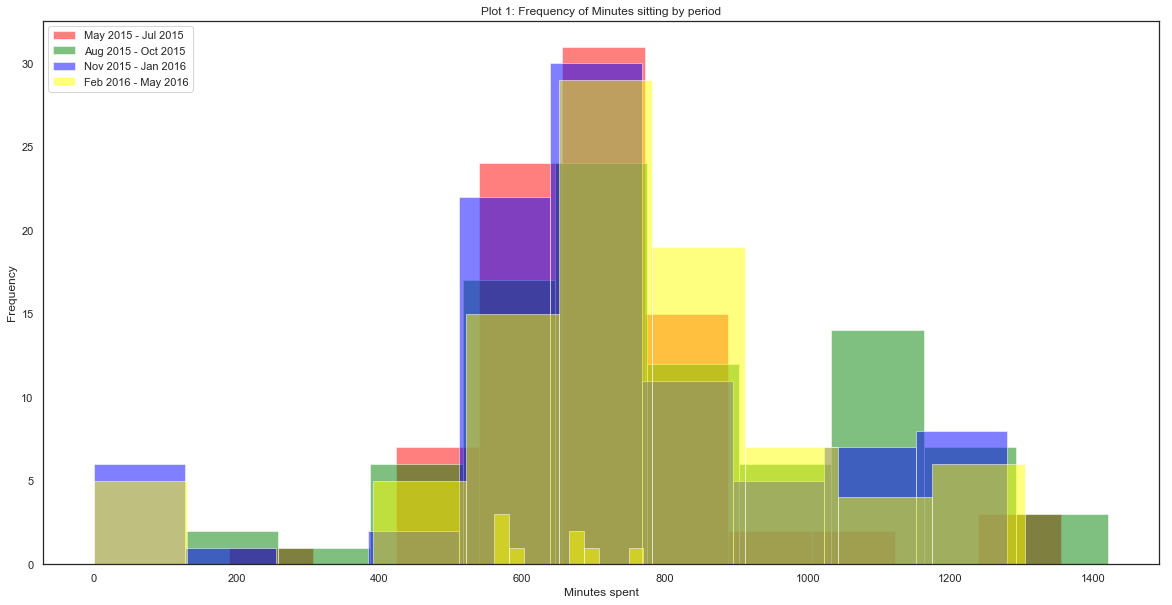

In [494]:
#plt.hist(df['Minutes_of_slow_activity'], color='red', alpha=.5, label='Minutes of slow activity')
#plt.hist(df['Minutes_of_intense_activity'], color='green', alpha=.5, label='Minutes of intense activity')
plt.hist(p1_sitting, color='red', label='May 2015 - Jul 2015', alpha=.5)
plt.hist(p2_sitting, color='green', label='Aug 2015 - Oct 2015', alpha=.5)
plt.hist(p3_sitting, color='blue', label='Nov 2015 - Jan 2016',  alpha=.5)
plt.hist(p4_sitting, color='yellow', label='Feb 2016 - May 2016',  alpha=.5)
plt.hist(p4_may_sit, color='yellow', alpha=.5)
plt.xlabel('Minutes spent')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.title('Plot 1: Frequency of Minutes sitting by period')
plt.show()

## Plot 2: Dist Plot of Minutes Sitting by Time Period

In [495]:
# Showing the  information in a seaborn facet grid.
#Setting the overall aesthetic
sns.set(style="ticks")

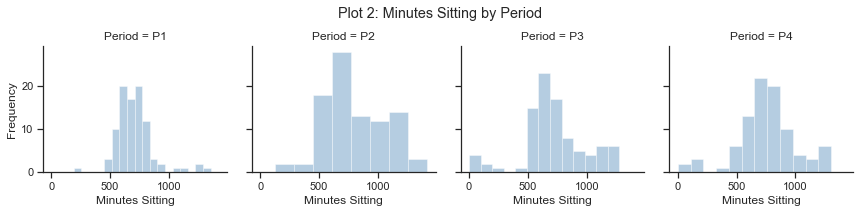

In [496]:
# Plot 2: Structure of our data.
g = sns.FacetGrid(df, col="Period")

# Name the plot type and the variable to be plotted using the structure.
#Have to specify kde=false to make sure you don't get smoothed out distribution curve
g.map(sns.distplot, "Minutes_sitting", color="steelblue", kde=False)

# Moving the plots apart to make room for our titles.
plt.subplots_adjust(top=.8)

# Making a more informative axis name.
g.set_axis_labels("Minutes Sitting", "Frequency")
plt.suptitle('Plot 2: Minutes Sitting by Period')

plt.show();


## Plot 3: Cat Plot

If you have a lot of data and it's dense, it'll bunch up and it'll be hard to see where it lies.  if you add jitter=True, it'll pull it apart so you can see where points are more easily.

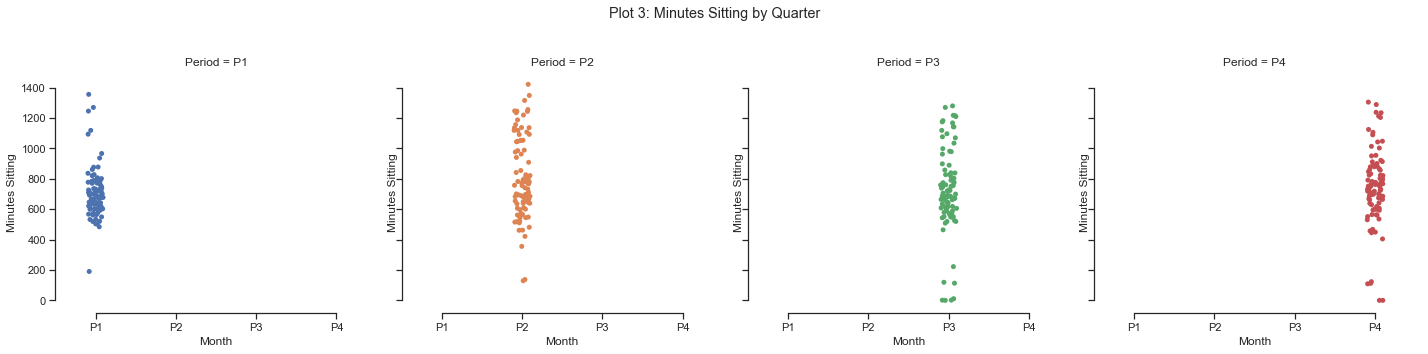

In [497]:
# Get minutes sitting by month and quarter, and manually set the order of the x axis (otherwise months start at Aug)
ax = sns.catplot(data=df, x="Period", y="Minutes_sitting", col="Period", 
            order=['P1','P2','P3','P4'])

# Moving the plots apart to make room for titles.
plt.subplots_adjust(top=.8)

# Making a more informative axis name.
ax.set(xlabel='Month', ylabel='Minutes Sitting')
plt.suptitle('Plot 3: Minutes Sitting by Quarter')

# Removing excess lines around the plot.
sns.despine(trim=True)

plt.show();

## Plot 4: KDE plot

Kernel Density Estimation is like a smoothed histogram. Histograms are limited by the fact that they are inherently discrete (via bins) and are thus more appropriate for displaying data on discrete variables and can be very sensitive to bin size.

What you are actually doing with the Kernel Density Estimation is estimating the probability density function.  The area under the curve is 1, and the probability of a value being between x1 and x2 is the area under the curve between those two points.

The number of Y values will determine the "resolution" of the curve, so if you assume a straight line between every two adjacent Y points you can calculate an approximation of the area under the curve between those two points.

To determine the probability of an x value P(xa<x<xb).

Y axis is difference in probabilities between one probability and other probability points.

The points that are higher, have a higher probability of occurring in the data.  Higher points = higher probability.  Lower points = lowest probability.  Usually, probability lies between 0 and 1.

Use KDE to see the means, and the shape of the distribution.  If you have multiple means then it's not a normal distribution.

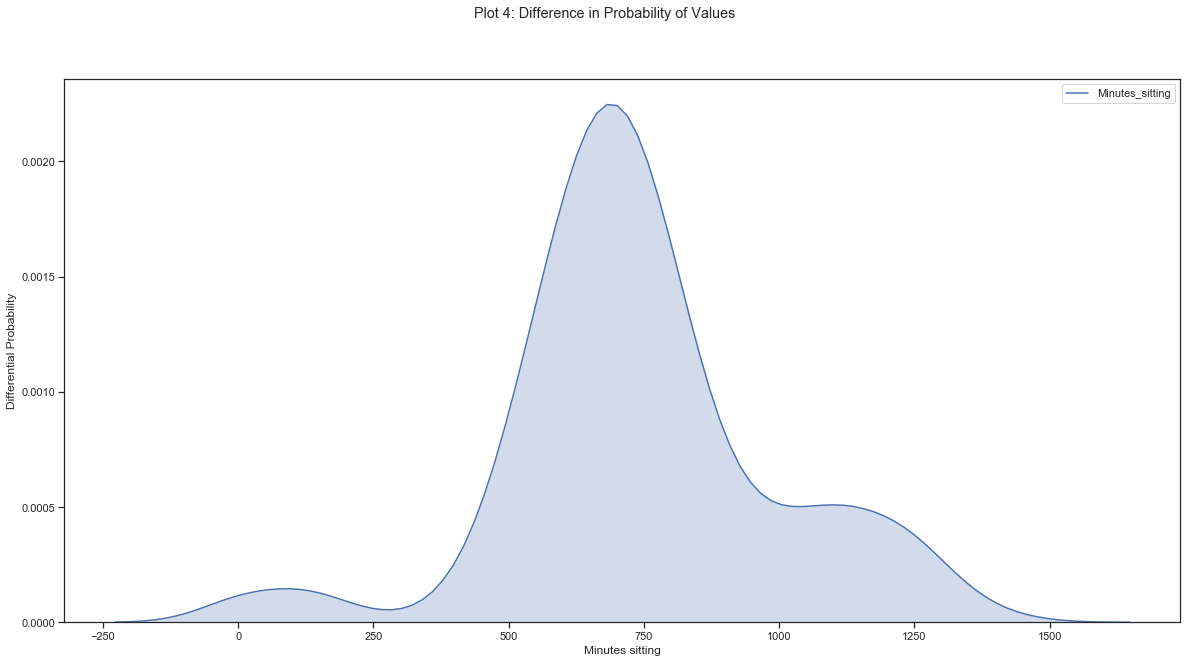

In [498]:
#bare kdeplot using kdeplot
ax = sns.kdeplot(df.Minutes_sitting, shade=True)
ax.set(xlabel='Minutes sitting', ylabel='Differential Probability')
plt.suptitle('Plot 4: Difference in Probability of Values');

## Plot 5: Distribution Plot and Rug Plot

Distribution plot flexibly plots a univariate distribution of observations

A rug plot is a compact way of illustrating the marginal distributions of a variable along x and y. Positions of the data points along x and y are denoted by tick marks, reminiscent of the tassels on a rug.

Rug plot under KDE plot is more visually appealing.  Tells you the clustering of data.

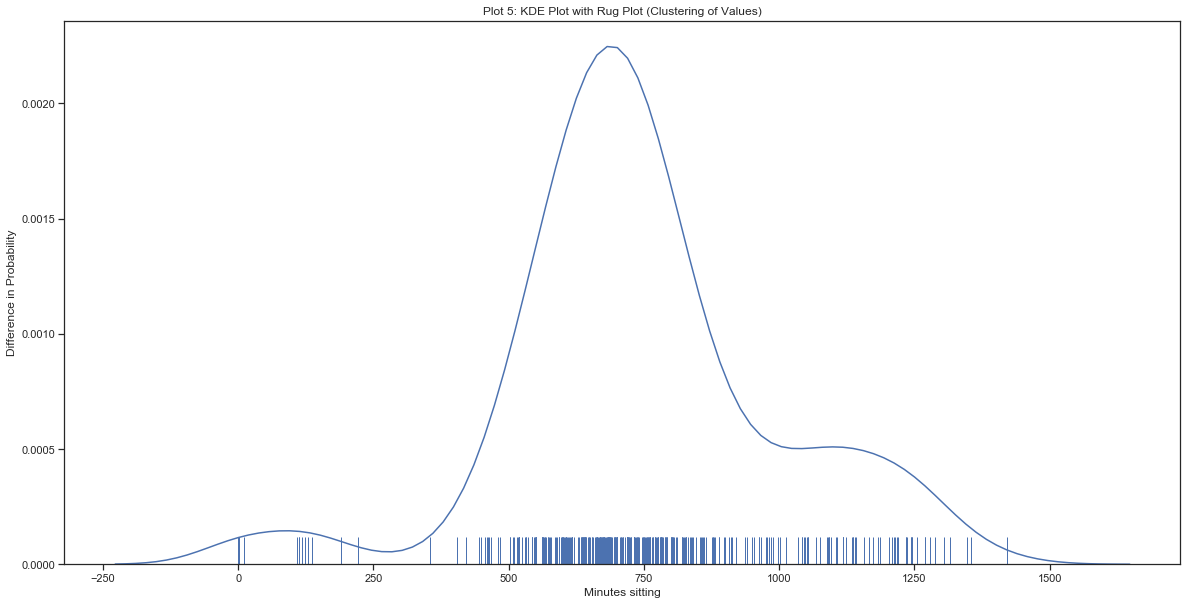

In [499]:
#density, rug, no hist
ax = sns.distplot(df.Minutes_sitting, hist=False, rug=True)
ax.set(xlabel='Minutes sitting', ylabel='Difference in Probability')
plt.title('Plot 5: KDE Plot with Rug Plot (Clustering of Values)');

## Plot 6: Swarm Plot of Minutes Sitting by Time Period

Visually appealing - shows you distribution and densities.

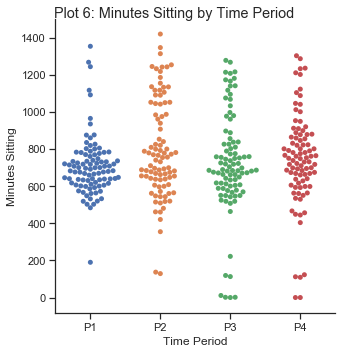

In [500]:
# Swarm Plot
ax = sns.catplot(data=df, x="Period", y="Minutes_sitting", kind="swarm", order=['P1', 'P2', 'P3', 'P4'])
ax.set(xlabel='Time Period', ylabel='Minutes Sitting')
plt.suptitle('Plot 6: Minutes Sitting by Time Period');

# Plot 7: Violin plot:

Boxplot and kde plot = default
Rugplot and kde plot = inner='stick'
If two groups only = hue='group_name' where group_name is column name for two categorical variables (True vs. False)


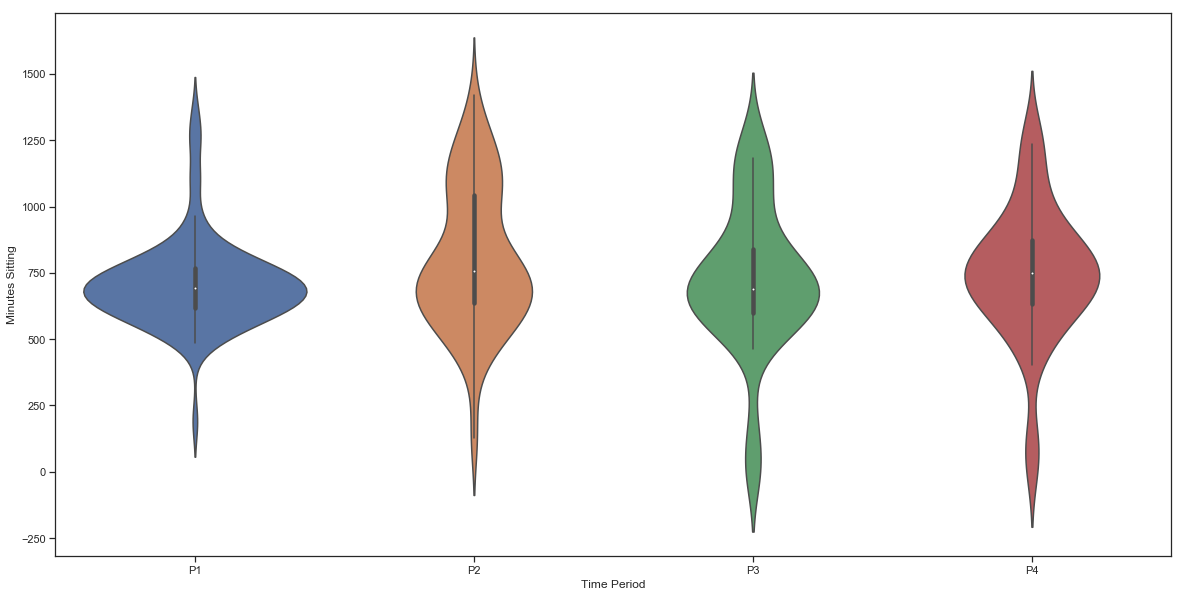

In [501]:
# Plot 1: 
# Violin Plot
ax = sns.violinplot(data=df, x="Period", y="Minutes_sitting", order=['P1', 'P2', 'P3', 'P4'])
ax.set(xlabel='Time Period', ylabel='Minutes Sitting');

# Question 2: Choose two continuous variables, and plot them three different ways


## Plot 1: Joint Plot

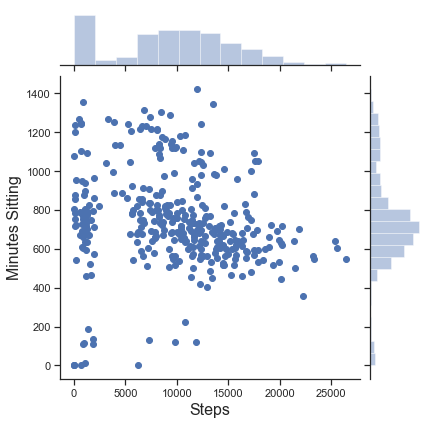

In [502]:
# Plot 1A: Joint Plot 
h = sns.jointplot(data=df, x="Steps", y="Minutes_sitting")
h.set_axis_labels('Steps', 'Minutes Sitting', fontsize=16);

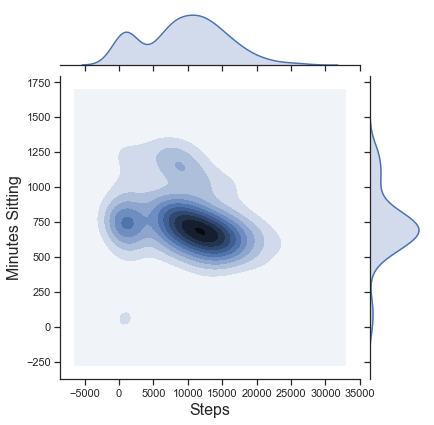

In [503]:
# Plot 1B: Joint Plot with KDE to visualize a bivariate distribution
h = sns.jointplot(data=df, x="Steps", y="Minutes_sitting", kind="kde",)
h.set_axis_labels('Steps', 'Minutes Sitting', fontsize=16);

## Plot 2: Category Plot

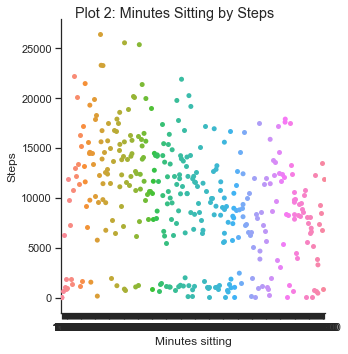

In [504]:
ax = sns.catplot(data=df, x="Minutes_sitting", y="Steps")
ax.set(xlabel='Minutes sitting', ylabel='Steps')
plt.suptitle('Plot 2: Minutes Sitting by Steps');

## Plot 3: Scatterplot

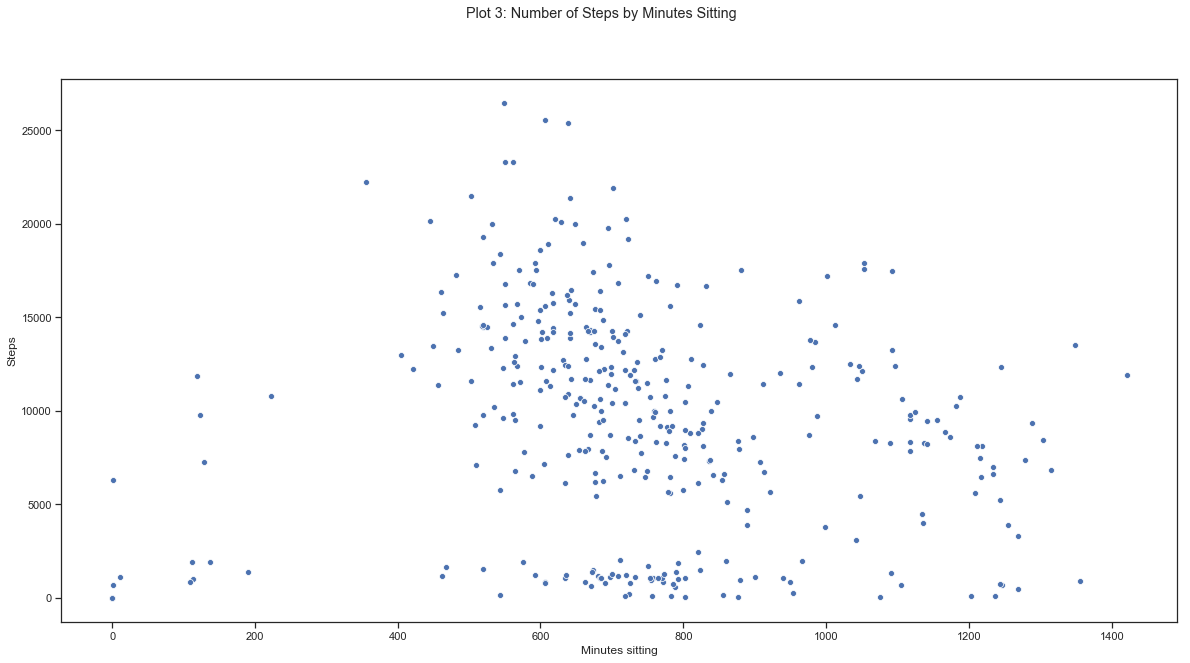

In [505]:
ax = sns.scatterplot(data=df, x="Minutes_sitting", y='Steps')
ax.set(xlabel='Minutes sitting', ylabel='Steps')
plt.suptitle('Plot 3: Number of Steps by Minutes Sitting');

# Question 3: Choose one continuous variable and one categorical variable, and plot them six different ways

## Plot 1: Distribution Plot

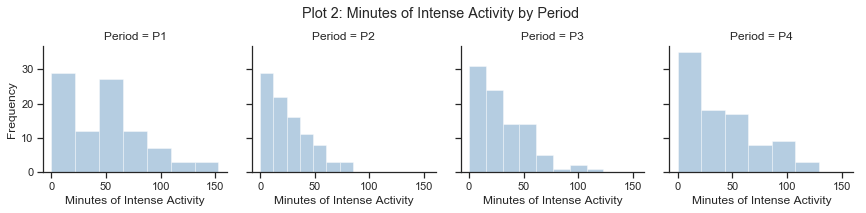

In [506]:
# Plot 2: Structure of our data.
g = sns.FacetGrid(df, col="Period")

# Name the plot type and the variable to be plotted using the structure.
g.map(sns.distplot, "Minutes_of_intense_activity", color="steelblue", kde=False)

# Moving the plots apart to make room for our titles.
plt.subplots_adjust(top=.8)

# Making a more informative axis name.
g.set_axis_labels("Minutes of Intense Activity", "Frequency")
plt.suptitle('Plot 2: Minutes of Intense Activity by Period')

plt.show();


## Plot 2: Categorical Plot

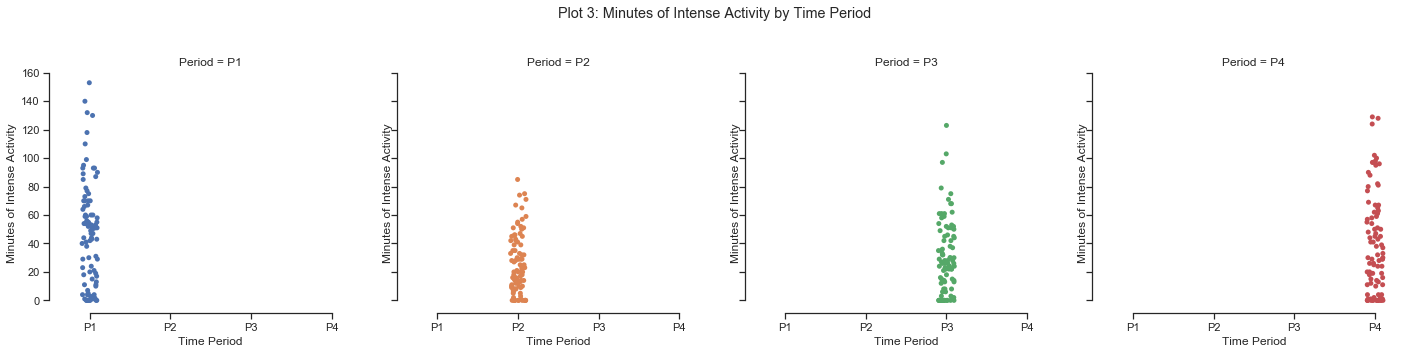

In [507]:
# Get minutes sitting by month and quarter, and manually set the order of the x axis (otherwise months start at Aug)
ax = sns.catplot(data=df, x="Period", y="Minutes_of_intense_activity", col="Period", 
            order=['P1','P2','P3','P4'])

# Moving the plots apart to make room for titles.
plt.subplots_adjust(top=.8)

# Making a more informative axis name.
ax.set(xlabel='Time Period', ylabel='Minutes of Intense Activity')
plt.suptitle('Plot 3: Minutes of Intense Activity by Time Period')

# Removing excess lines around the plot.
sns.despine(trim=True)

plt.show();

## Plot 3: Barplot

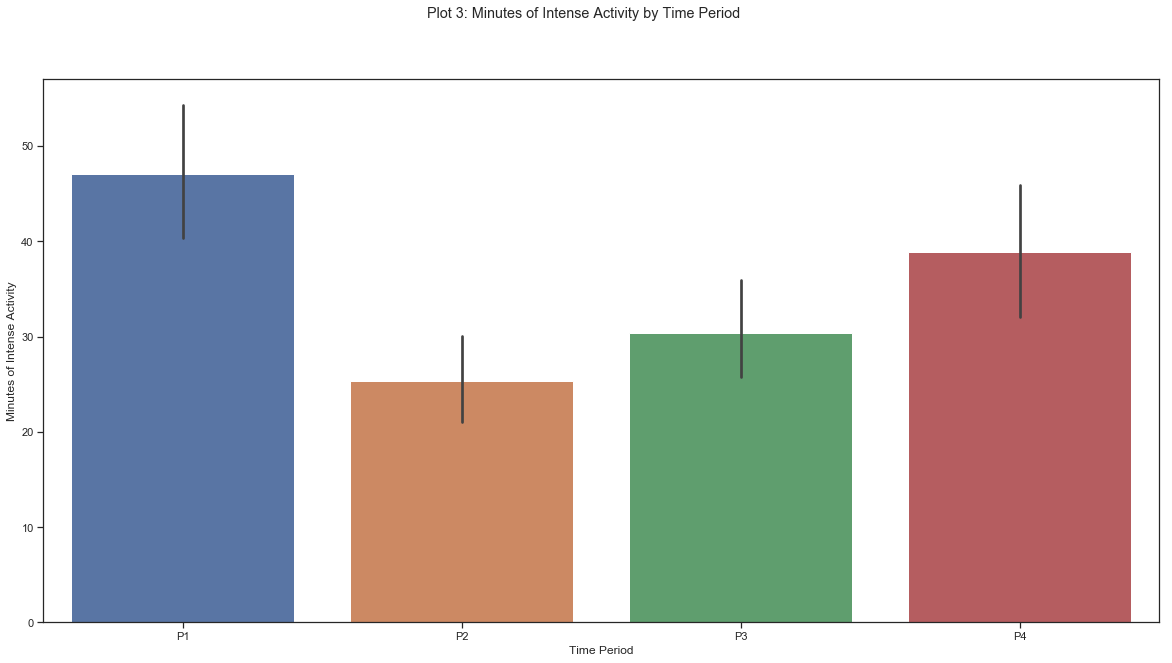

In [508]:
ax = sns.barplot(data=df, x="Period", y="Minutes_of_intense_activity" )

# Making a more informative axis name.
ax.set(xlabel='Time Period', ylabel='Minutes of Intense Activity')
plt.suptitle('Plot 3: Minutes of Intense Activity by Time Period')

plt.show();

## Plot 4: Boxplot

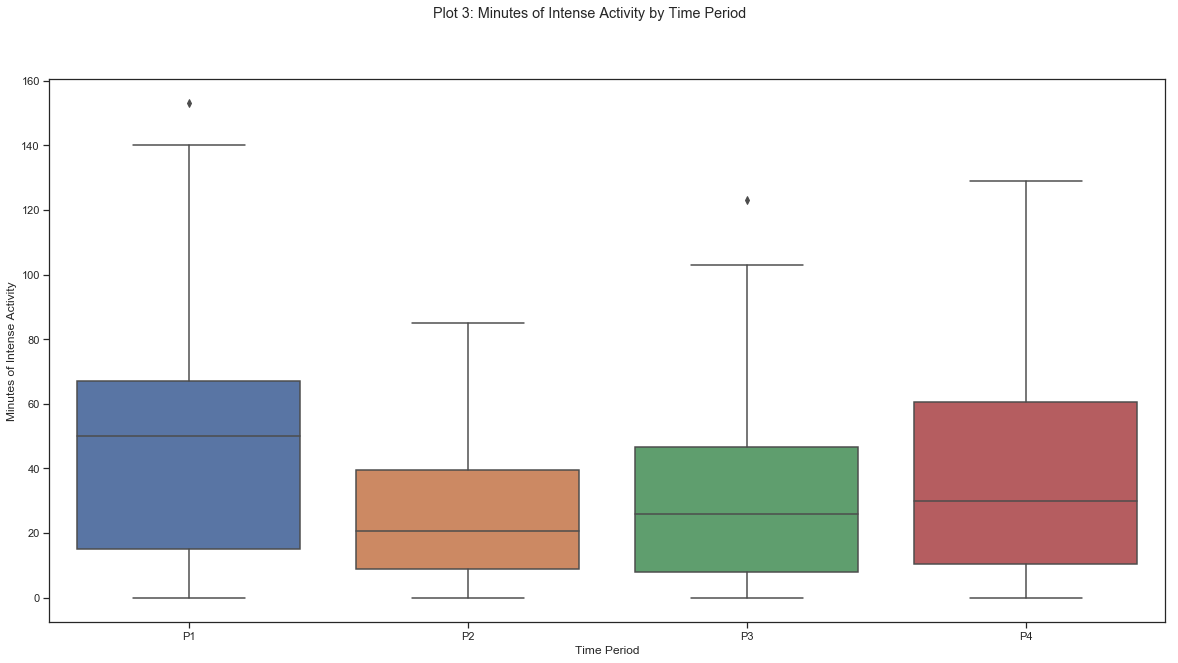

In [509]:
ax = sns.boxplot(data=df, x="Period", y="Minutes_of_intense_activity" )

# Making a more informative axis name.
ax.set(xlabel='Time Period', ylabel='Minutes of Intense Activity')
plt.suptitle('Plot 3: Minutes of Intense Activity by Time Period')

plt.show();

## Plot 5: Swarm Plot

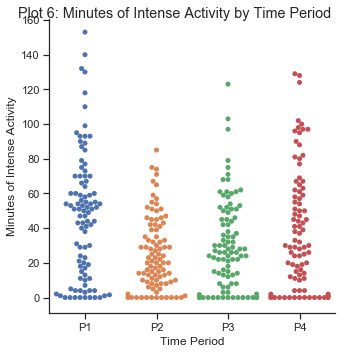

In [510]:
# Swarm Plot
ax = sns.catplot(data=df, x="Period", y="Minutes_of_intense_activity", kind="swarm", order=['P1', 'P2', 'P3', 'P4'])
ax.set(xlabel='Time Period', ylabel='Minutes of Intense Activity')
plt.suptitle('Plot 6: Minutes of Intense Activity by Time Period');

## Plot 6: Violin Plot

Combine boxplot with KDE to compare distributions of intense activity by Time Period of observations

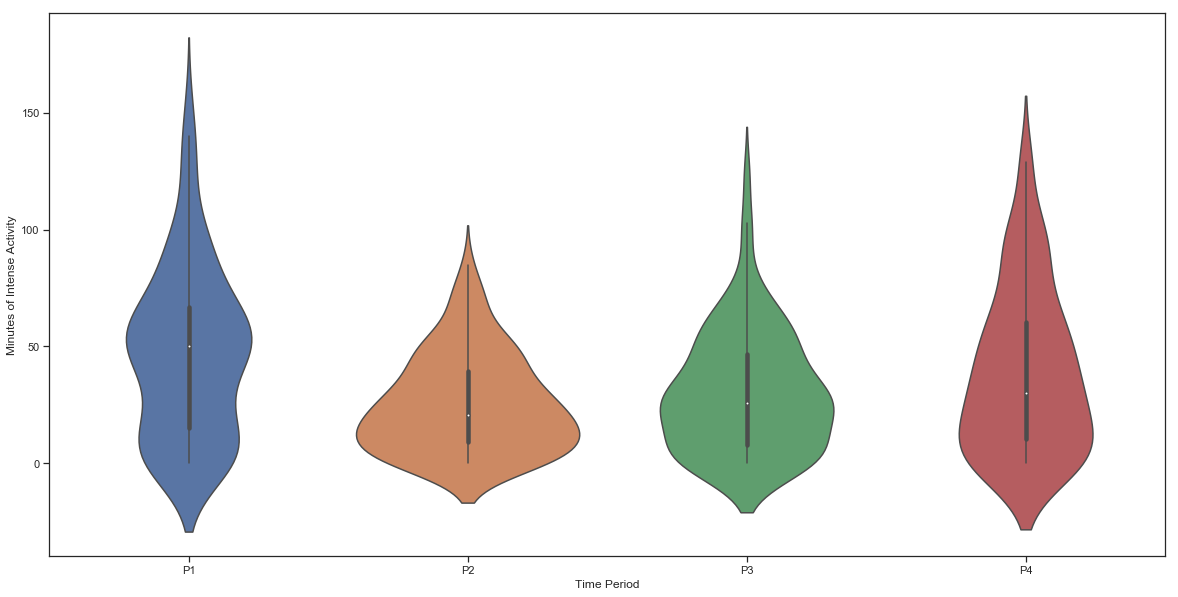

In [511]:
ax = sns.violinplot(data=df, x="Period", y="Minutes_of_intense_activity", order=['P1', 'P2', 'P3', 'P4'])
ax.set(xlabel='Time Period', ylabel='Minutes of Intense Activity');

# Question 4: Create one master plot that gives insight into four continuous variables and their interrelationships, including:

- Probability distributions
- Bivariate relationships
- Whether the distributions or the relationships vary across groups

NOTE: realized when I looked at df that because of the way the data was set up, the continuous variables were made into discrete variables with continuous values.

So, can only get two variables plotted - minutes sitting OR moderate activity OR intense activty, etc:
column x = Period
column y = Minutes_sitting [10, 35, 99, 1001] OR column = Minutes_of_intense_activity [56, 92, 1054, 83]

Vs. getting all activity levels plotted to see relationship:
column = Activity [sitting, slow, moderate, intense]
column = Minutes [10, 56, 109, 2]

As a result, will use sns df "fmri" to plot  variables and show how they relate to each other looking at:
timepoint, event, region, signal.

See sns.relplot - Plotting subsets of data with semantic mappings:
https://seaborn.pydata.org/tutorial/relational.html


In [512]:
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


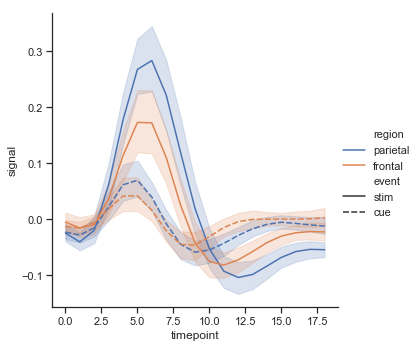

In [513]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            kind="line", data=fmri);

## Me playing with ways to work with the data I have to plot it:

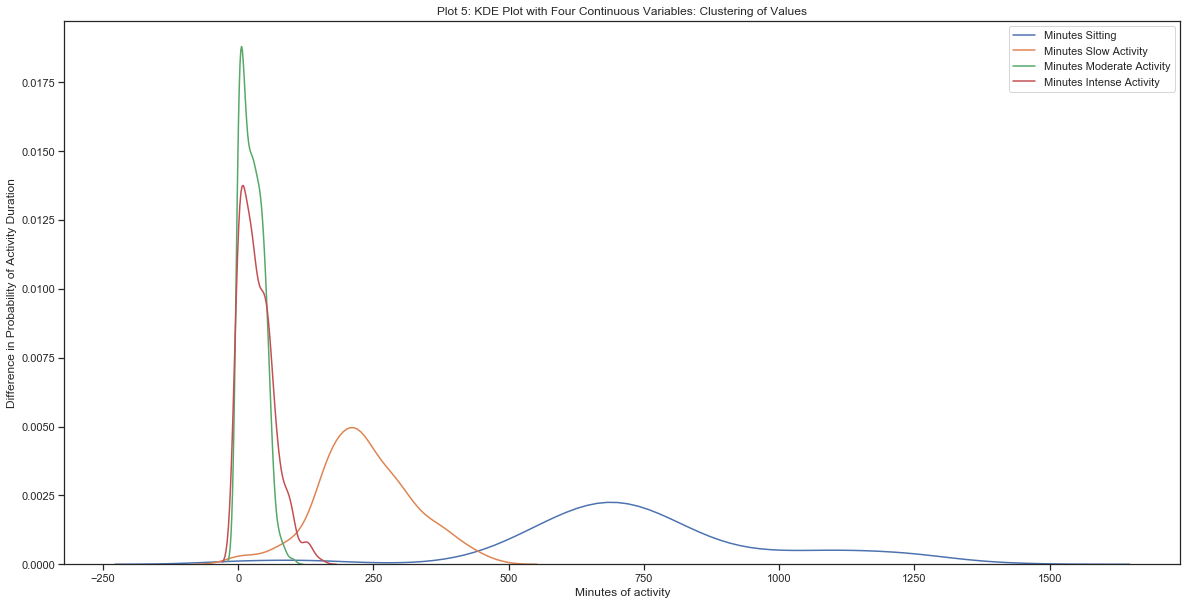

In [514]:
#Distribution Plot density, rug, no hist
ax = sns.distplot(df.Minutes_sitting, hist=False, label='Minutes Sitting')
ax = sns.distplot(df.Minutes_of_slow_activity, hist=False, label='Minutes Slow Activity')
ax = sns.distplot(df.Minutes_of_moderate_activity, hist=False, label='Minutes Moderate Activity')
ax = sns.distplot(df.Minutes_of_intense_activity, hist=False, label='Minutes Intense Activity')

ax.set(xlabel='Minutes of activity', ylabel='Difference in Probability of Activity Duration')
plt.title('Plot 5: KDE Plot with Four Continuous Variables: Clustering of Values')
plt.legend()
plt.show();

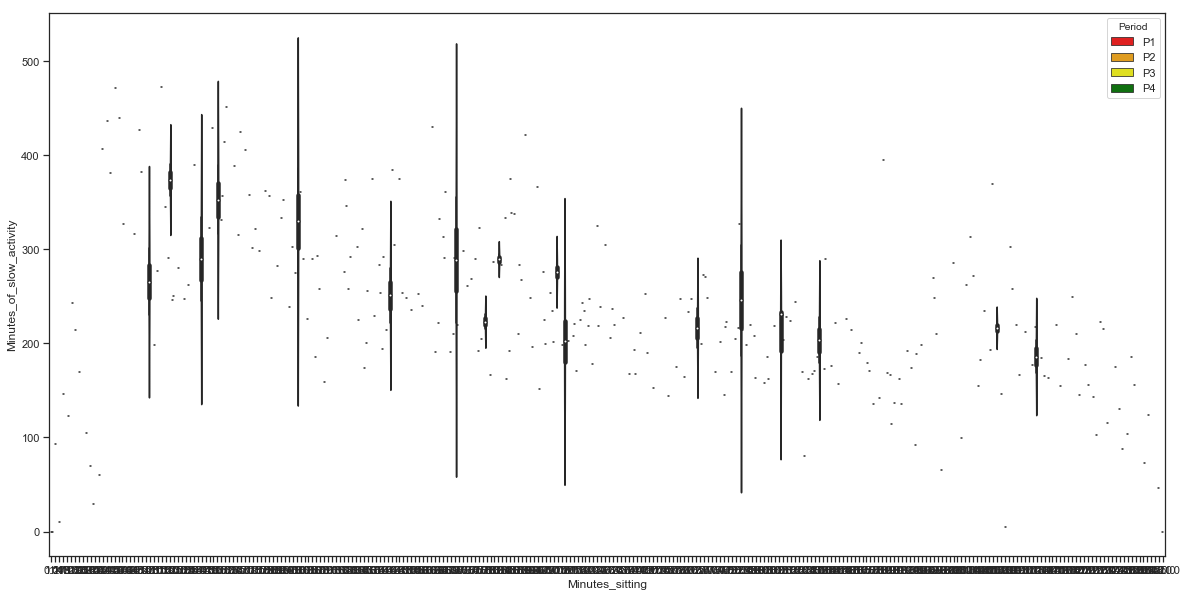

In [515]:
# Violin plot attempt
May_2015_Jul_2015 = (df['Period'] == 'P1')
Aug_2015_Oct_2015 = (df['Period'] == 'P2')
Nov_2015_Jan_2016 = (df['Period'] == 'P3')
Feb_2015_May_2016 = (df['Period'] == 'P4')

with sns.axes_style(style=None):
    sns.violinplot("Minutes_sitting", "Minutes_of_slow_activity", hue="Period", data=df,
                   
                   palette=["red", "orange", 'yellow', 'green']);


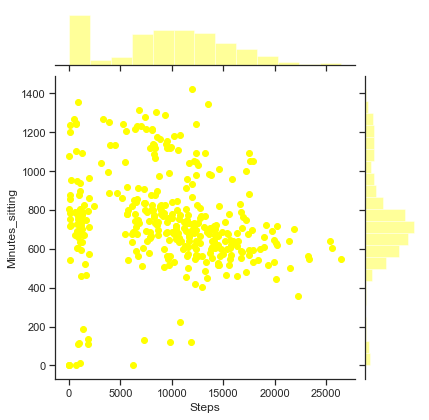

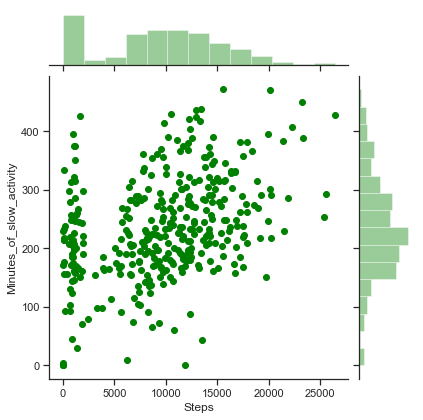

In [516]:
# Joint Plot attempt
sns.jointplot(data=df, x="Steps", y="Minutes_sitting", color='yellow')
sns.jointplot(data=df, x="Steps", y="Minutes_of_slow_activity", color='green')
plt.show()

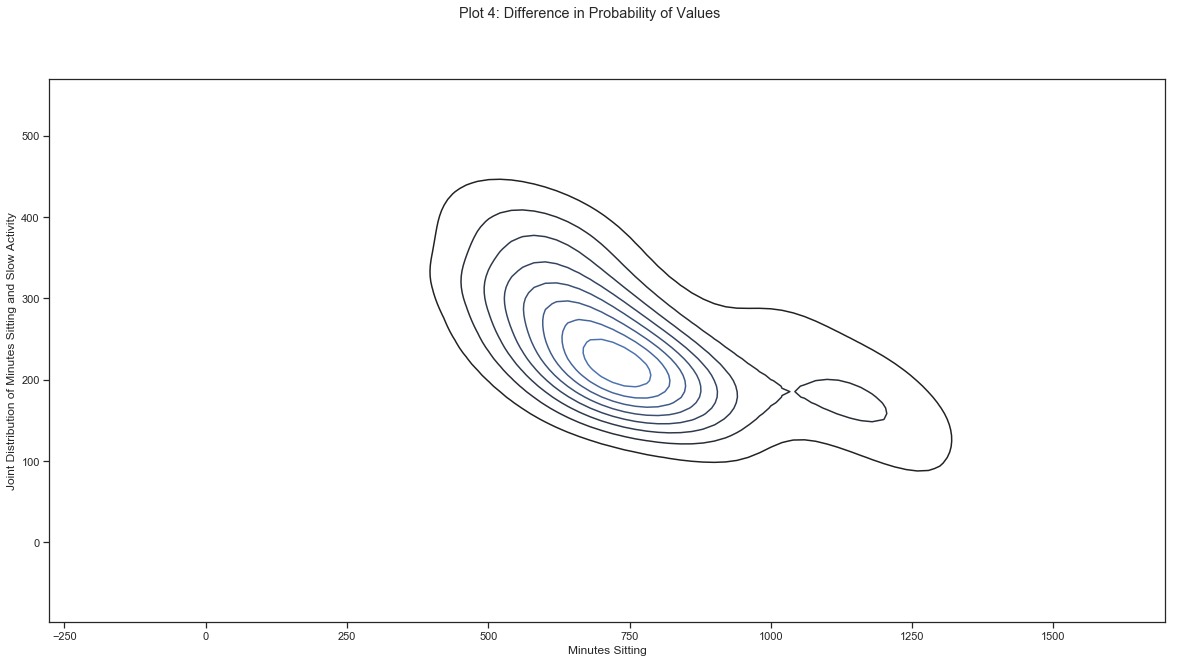

In [517]:
#KDE Plot attempt: kdeplot using two data sources for bivariate analysis
ax = sns.kdeplot(data=df.Minutes_sitting, data2=df.Minutes_of_slow_activity)
#ax = sns.kdeplot(data=df.Minutes_sitting, data2=df.Minutes_of_moderate_activity)
#ax = sns.kdeplot(data=df.Minutes_sitting, data2=df.Minutes_of_intense_activity)


ax.set(xlabel='Minutes Sitting', ylabel='Joint Distribution of Minutes Sitting and Slow Activity')
plt.suptitle('Plot 4: Difference in Probability of Values');

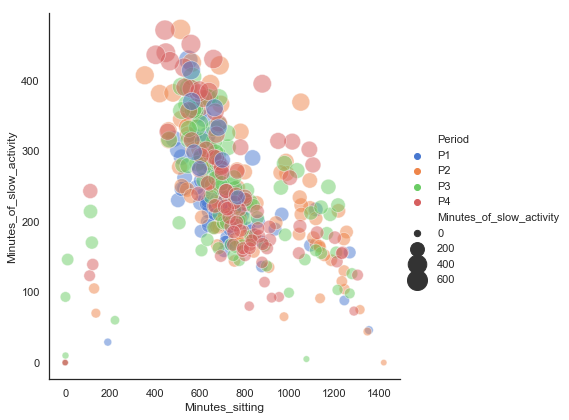

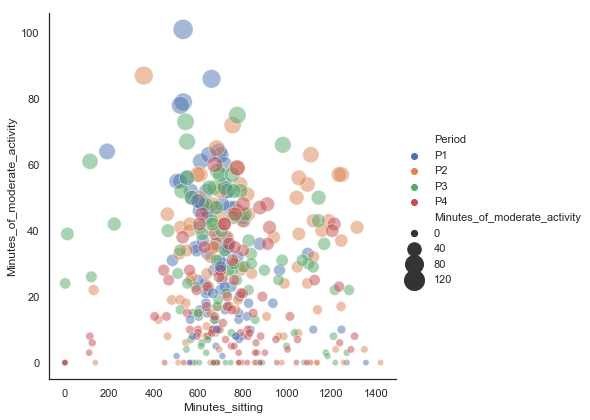

In [518]:
#Relating variables with scatterplot attempt: Problem with continuous data that is categorized as Minutes_of_slow_activity
# vs having column of data "Minutes" and column of data "Activity"
sns.set(style="white")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="Minutes_sitting", y="Minutes_of_slow_activity", hue="Period", size="Minutes_of_slow_activity",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

sns.relplot(x="Minutes_sitting", y="Minutes_of_moderate_activity", hue="Period", size="Minutes_of_moderate_activity",
            sizes=(40, 400), alpha=.5,
            height=6, data=df);



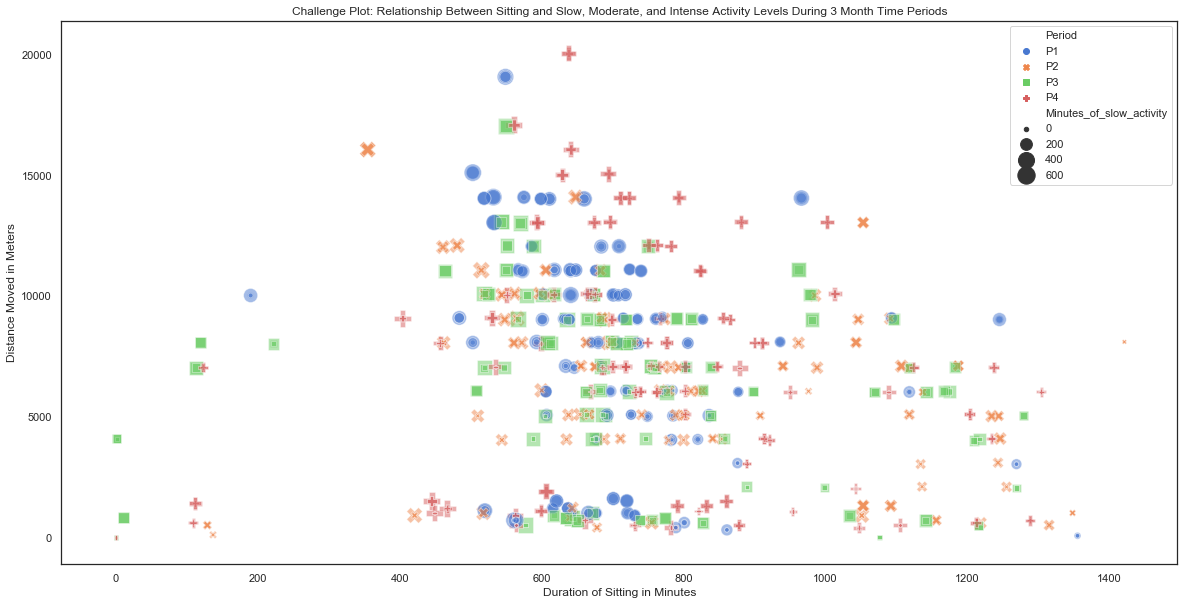

In [519]:
#Scatter Plot attempt: Ugh
sns.scatterplot(data=df, x="Minutes_sitting", y="Distance_meters", hue='Period', size="Minutes_of_slow_activity",
               sizes=(20, 300), alpha=.5, style="Period", palette="muted")
sns.scatterplot(data=df, x="Minutes_sitting", y="Distance_meters", hue='Period', size="Minutes_of_moderate_activity",
               sizes=(20, 300), alpha=.5, style="Period", palette="muted", legend=False)
sns.scatterplot(data=df, x="Minutes_sitting", y="Distance_meters", hue='Period', size="Minutes_of_intense_activity",
               sizes=(20, 300), alpha=.5, style="Period", palette="muted", legend=False)

plt.title('Challenge Plot: Relationship Between Sitting and Slow, Moderate, and Intense Activity Levels During 3 Month Time Periods')

# Set x-axis label
plt.xlabel('Duration of Sitting in Minutes')
# Set y-axis label
plt.ylabel('Distance Moved in Meters')
plt.show()

## Decided to rework data source: restructure column structure to see if data can be plotted any better.  Created df_activity based on new csv file with adjusted column structure

### Better insights so far, but noisy
Period 4 shows greatest distance gained and minutes sitting than any other period
Next is Period 1, but those few seem to be outliers since most Period 1 circles cluster at shortest distances

- Moderate exercise seems to be far mor related to greater distances than any other activity level - including intense activity.
- Activity levels tend to cluster in similar time duration with sitting being the longest activity duration than all others.


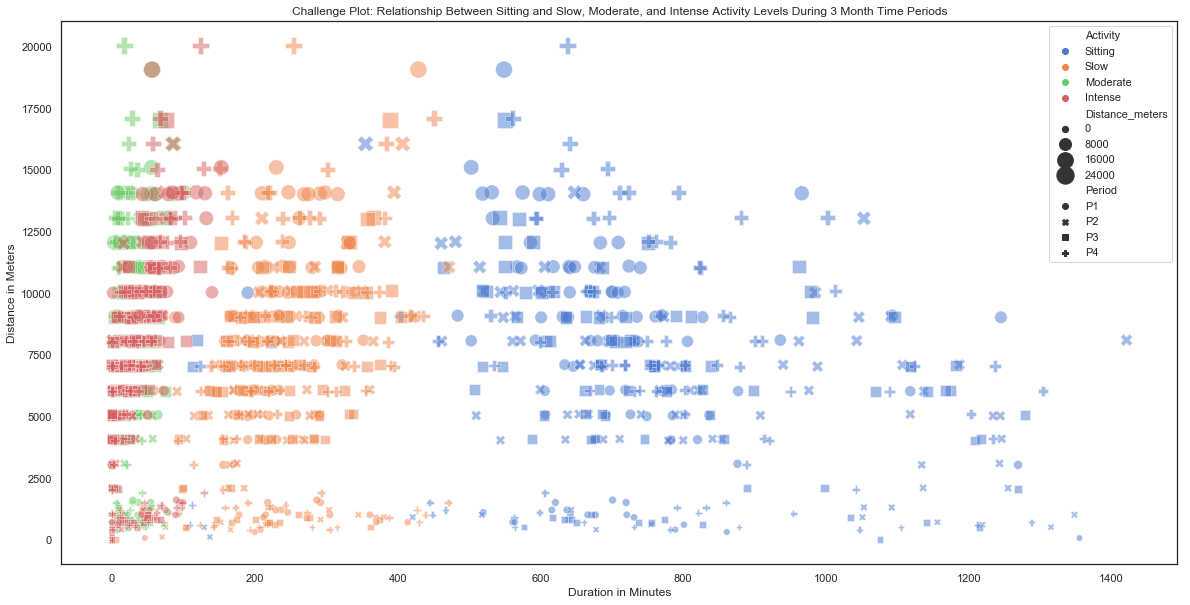

In [520]:
# using df_activity instead of df: All activity minutes vs. Distance in Meters
sns.scatterplot(data=df_activity, x="Minutes", y="Distance_meters", hue='Activity', size="Distance_meters",
               sizes=(40, 300), alpha=.5, style="Period", palette="muted")

plt.title('Challenge Plot: Relationship Between Sitting and Slow, Moderate, and Intense Activity Levels During 3 Month Time Periods')

# Set x-axis label
plt.xlabel('Duration in Minutes')
# Set y-axis label
plt.ylabel('Distance in Meters')
plt.show()
                

### Clearer, but doesn't shed information about the relationship between the activities

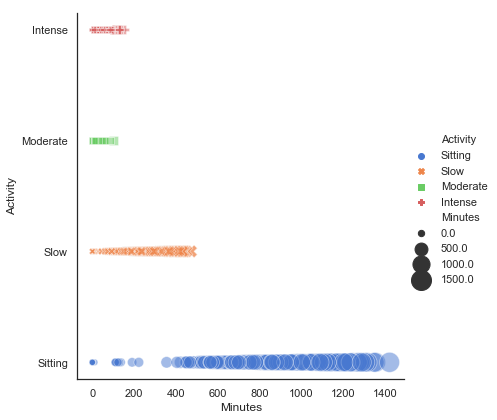

In [521]:
#Trying rel plot again: Relating variables with scatterplot attempt:
sns.set(style="white")

# plot parameters
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# Plot Time spent against Activity
sns.relplot(x="Minutes", y="Activity", hue="Activity", style='Activity', size="Minutes",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_activity);

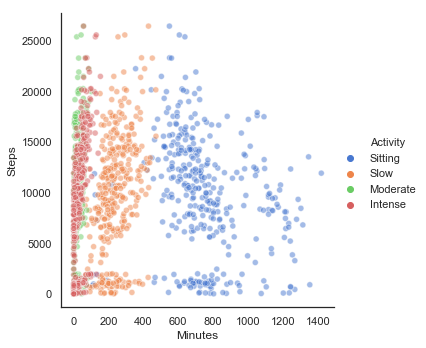

In [522]:
#One more try Relating variables with relplot:
sns.set(style="white")


# plot parameters
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="Minutes", y="Steps", hue="Activity",
            alpha=.5, palette="muted",
            data=df_activity, kind='scatter');


## Clear Relationship Between Increased Time Sitting and Maximum Clusters of Time Spent and Steps Taken During Other Activity Levels

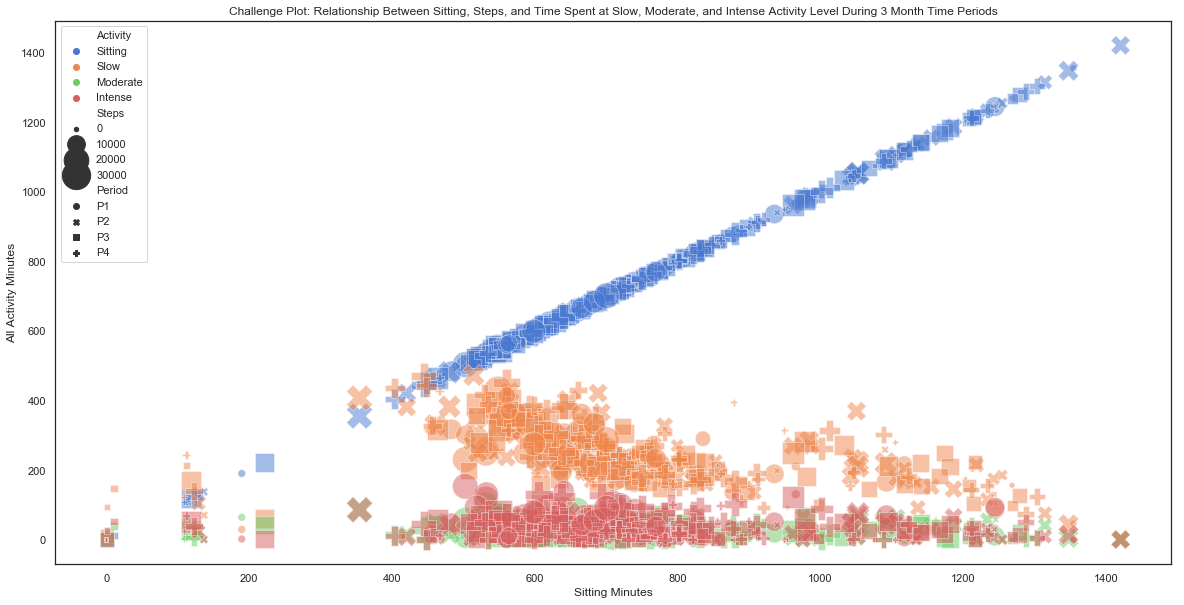

In [523]:
# using df_activity instead of df: Minutes sitting vs distance in meters
sns.scatterplot(data=df_activity, x="Minutes_sitting", y="Minutes", hue='Activity', size="Steps",
               sizes=(20, 800), alpha=.5, style="Period", palette="muted")

plt.title('Challenge Plot: Relationship Between Sitting, Steps, and Time Spent at Slow, Moderate, and Intense Activity Level During 3 Month Time Periods')

# Set x-axis label
plt.xlabel('Sitting Minutes')
# Set y-axis label
plt.ylabel('All Activity Minutes')
plt.show()

# Pros and Cons of different plots I used:

## Histogram (matplotlib)
### Pros:
- Easy to use, quick and dirty look at data
- Good for seeing distribution of continuous data
- Good for univariate analysis

### Cons:
- Confusing with multiple variables: bivariate or multivariate analyses

## Distplot (Histogram) with Facetgrid
### Pros:
- Easy to use, quick and dirty look at data
- Good for seeing distribution of continuous data
- With FacetGrid, separates out distribution of continuous data by catgorical/discrete data so it's easier to see

### Cons:
- May provide unnecessary information that distracts from message
- Without Facetgrd, may be confusing with multiple variables
- Harder to compare the subplots against each other


## Catplot with subplots
### Pros:
- Multivariate analysis: Good for showing relationship between a numerical variable and one or more categorical variables
- Easy to use

### Cons:
- Harder to compare across categorical variable(s)

## KDE plot
### Pros:
- 1 data source: Good for seeing the difference in differential of probabilities of continuous variables
- 1 data source: Quick and dirty way to see the distribution to know if it's normal/non-normal distribution
- 1 data source: See the different means that are popping up - you can see the clusters - which show you the means.
- If you have multiple means then it's not a normal distribution
- 2 data sources: see the joint distribution between the two variables

### Cons:
- Not a whole lot of information beyond shape of distribution in 1 data source

## Distplot (no histogram) and Rugplot
### Pros:
- Can plot 1 variable easily to get "quick and dirty" sense of possible relationships
- Can see distribution of data smoothly with hist=False
- Can add rugplot to visualize clustering of data

### Cons:
- Only one variable

## Swarm Plot
### Pros:
- Categorical data: Good for seeing distribution and clustering of categorical data along axes so they don't overlap
- Gives a good representation of data
- 

### Cons:
- Does not scale well for large data sets

## Violin Plot
### Pros:
- Shows the distribution of categorical data across several levels so they can be compared
- Shows a kernel density estimation of the underlying distribution

### Cons:
- Small sample size can make estimation look deceptively smooth

## Bar Plot
### Pros:
- Good to estimate of central tendency for a numeric variable with the height of each rectangle
- Provides some indication of the uncertainty around that estimate if using error bars

### Cons:
- Shows only the mean (or other estimator) value, but doesn't show the distribution of values at each level of the categorical variable

## Box Plot
### Pros:
- Handles large data easily
- Shows quartiles of dataset
- Whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers”
- Shows distribution of results and provides indications of symmetry within the data: easier to compare differences between variables

### Cons:
- Exact values are not retained

## Joint Plot
### Pros:
- easily see crossover relationship between two variables (750 minutes seems to be max time sitting that allows steps to go up)


## Relplot
### Pros:
- Show relationship between two variables as well as different subsets of the data using the hue, size, and style parameters.
- Can show up to three dimensions independently by using all three semantic types

### Cons:
- Can be hard to interpret and is often ineffective

- Note: Using redundant semantics (i.e. both hue and style for the same variable) can be helpful for making graphics more accessible.

## Scatter Plot
### Pros:
- Bivariate distributions
- Shows overview of data
- Way to find outliers
- Shows patterns between some dimensions

### Cons:
- "Discretization": happens when decimal places are rounded off, measurements are not accurate enough, or a data field is categorical
- "Overplotting": When there are so few values, the variable is really a categorical scale being represented using numbers and values get all stacked on top of each other
- Discretization and overplotting make it difficult to see the full quantity of values in the dataset, and correlation and clustering is harder to find with so few possible values on the x-axis

# Other Stuff:
    
Categorical scatterplots:
- stripplot() (with kind="strip"; the default)
- swarmplot() (with kind="swarm")

Categorical distribution plots:
- boxplot() (with kind="box")
- violinplot() (with kind="violin")
- boxenplot() (with kind="boxen")

Categorical estimate plots:
- pointplot() (with kind="point")
- barplot() (with kind="bar")
- countplot() (with kind="count")

# Lessons I Learned:

## Look at the structure of the data in your source before starting because once you start visualizing the data, you are limited by that structure.
(it's more of a pain to have to go back and fix it later)

### How are columns structured?
- What kind of data is each column?  Categorical, Discrete, or Continuous?

### Know the limitations of the column structure you have:
- If you have continuous data, but it's isolated by its type by column, then you end up only being able to treat it as a categorical or discrete variable in the visualization.

### When is this an issue?
This only seemed to be an issue in this assignmnt, when I wanted to look at multiple continuous variables and their relationships with each other (and a categorical variable) in the same plot.

In particular, scatterplots with more then two kinds of continous variables. You end up with the "discretization" or "overplotting" problems noted in its Cons.


## Restructure the data into columns that best fit the kind of visualizations you want to create

I couldn't create the last plot for the challenge with more than one kind of continuous variable without changing the structure of the data source.

I kept one discrete variable: Minutes_sitting

I created another categorical column: Activity that contained minutes sitting, slow, moderate, intense activities.

I created another continuous column: Minutes for each activity.

I think it was important to keep the discrete variable Minutes_setting because it gave me something to compare the rest of th activities against.


# Reminder to myself on clarifying data:

## Categorical variable:
Categorical variables contain a finite number of categories or distinct groups. Categorical data might not have a logical order. For example, in my case it might be month, year, or time period.

## Discrete variable:
Discrete variables are numeric variables that have a countable number of values between any two values. A discrete variable is always numeric. For example in df: Minutes_sitting, Minutes_of_slow_activity, Minutes_of_moderate_activity, Minutes_of_intense_activity.

## Continuous variable:
Continuous variables are numeric variables that have an infinite number of values between any two values. A continuous variable can be numeric or date/time. For example, in df_activity: Minutes, Steps, Distance_meters, Distance_miles

## 2018-09-06 Notes from Mentor Meeting after completion

See:
https://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/

For the challenge question, could've done a pair plot.  Probability distribution - you get that from the shape of the graph.  Probability down the diagonal with the histogram.  You can see the bivariate relationships.

Re: structure of data. Having each of the minutes separated out (sitting, slow, moderate, intensity) allows you to look at correlation.  But having the columns combined allows you to be able to plot them more easily by group.  If you want to do a boxplot by activity, for example, much easier to have them combined.  In Pandas, it's called doing a "melt".

Pair plots are most helpful for getting what challenge question asked (I only got bivariate relationship, but didn't get probability distribution).

Discrete variables: integers and sometimes order matters and sometimes it doesn't (1st, 2nd, 3rd place)

Continuous variables: floats: 1.1, 1.2, 1.3, etc.
http://www.statisticshowto.com/discrete-vs-continuous-variables/